In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from utils.RandomNoise import AddGaussianNoise
import random

# U-Net Denoysing

In [2]:
dataset_path = 'C:/Users/M1074839/Documents/datasets/cifar-10-python'
train_dataset = CIFAR10(root=dataset_path, train=True, transform=transforms.Compose([ToTensor()]))
test_dataset = CIFAR10(root=dataset_path, train=False, transform=transforms.Compose([ToTensor()]))

### Size of an image

In [3]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

### Size of dataset

In [4]:
print(f'taille dataset d\'entrainement {len(train_dataset)}')
print(f'taille dataset de test {len(test_dataset)}')

taille dataset d'entrainement 50000
taille dataset de test 10000


### Illustration of the noised apply to our dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1888064..1.1467805].


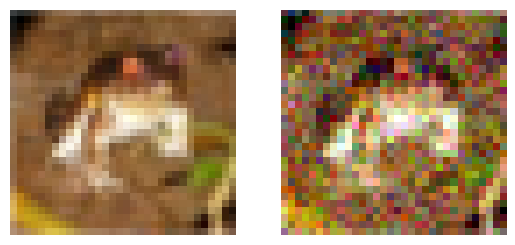

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2)
plt.axis('off')

axs[0].axis('off')
axs[0].imshow(train_dataset[0][0].permute(1,2,0))

axs[1].axis('off')
axs[1].imshow(AddGaussianNoise(mean=0, std=0.1)(train_dataset[0][0]).permute(1,2,0))

In [6]:
from torch.nn import MSELoss
from torch.optim import Adam
from utils.trainer.DenoisingTrainer import DenoysingTrainer
from models.UNet import UNet

learning_rate = 5e-2
noise = AddGaussianNoise(0., .1)
model = UNet(in_channels=3, depth=5, num_classes=3, task_name='denoising', dataset_name='CIFAR10')

loss = MSELoss()
optimizer  = Adam(params=model.parameters(), lr=learning_rate)

trainer = DenoysingTrainer(model=model, train_dataset=train_dataset, test_dataset=test_dataset, noise=noise, loss_fn=loss, optimizer=optimizer, batch_size=64, save_best=True)

device: cuda


In [7]:
trainer.train(num_epochs=10)

Epoch 1/10: 100%|█████████▉| 779/782 [00:15<00:00, 53.89it/s]C:\ProgramData\anaconda3\envs\pytorch\lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Epoch 1/10: 100%|██████████| 782/782 [00:15<00:00, 50.65it/s, Loss: 0.5015, PSNR: 21.0553]


Saving best model


Epoch 2/10: 100%|██████████| 782/782 [00:14<00:00, 52.58it/s, Loss: 0.1931, PSNR: 25.1993]


Saving best model


Epoch 3/10: 100%|██████████| 782/782 [00:14<00:00, 53.43it/s, Loss: 0.1790, PSNR: 25.5303]


Saving best model


Epoch 4/10: 100%|██████████| 782/782 [00:15<00:00, 51.72it/s, Loss: 0.1685, PSNR: 25.7912]


Saving best model


Epoch 5/10: 100%|██████████| 782/782 [00:15<00:00, 50.28it/s, Loss: 0.1663, PSNR: 25.8480]


Saving best model


Epoch 9/10: 100%|██████████| 782/782 [00:15<00:00, 51.99it/s, Loss: 0.1557, PSNR: 26.1344]


Saving best model


Epoch 10/10: 100%|██████████| 782/782 [00:14<00:00, 52.49it/s, Loss: 0.1618, PSNR: 25.9683]


In [8]:
loss, PSNR = trainer.evaluate()
print(f'loss: {loss:.4f}')
print(f'PSNR: {PSNR:.4f}')

Testing progress: 100%|██████████| 157/157 [00:01<00:00, 116.13it/s]


loss: 0.0001
PSNR: 22.3576


### Illustration of the denoising effect of our model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05098615..1.0992639].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0471702].


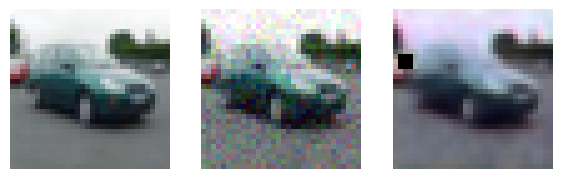

In [10]:
random_test_image = test_dataset[random.randint(0,len(test_dataset))][0]
random_test_image_noised = AddGaussianNoise(mean=0, std=0.05)(random_test_image)
model_predict_unnoised_image = model(random_test_image_noised[None, :, :, :].to('cuda'))

fig, axs = plt.subplots(nrows=1, ncols=3,  figsize=(7, 21))
plt.axis('off')

axs[0].axis('off')
axs[0].imshow(random_test_image.permute(1,2,0))

axs[1].axis('off')
axs[1].imshow(random_test_image_noised.permute(1,2,0))

axs[2].axis('off')
axs[2].imshow(model_predict_unnoised_image[0].permute(1,2,0).cpu().detach().numpy())

## Débruitage d'une image random

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.460867..4.6272745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-6.2816477..6.3472743].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.4447613..7.2858977].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-8.963762..9.366893].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-10.385737..9.293403].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.8956974].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.569389].
Clip

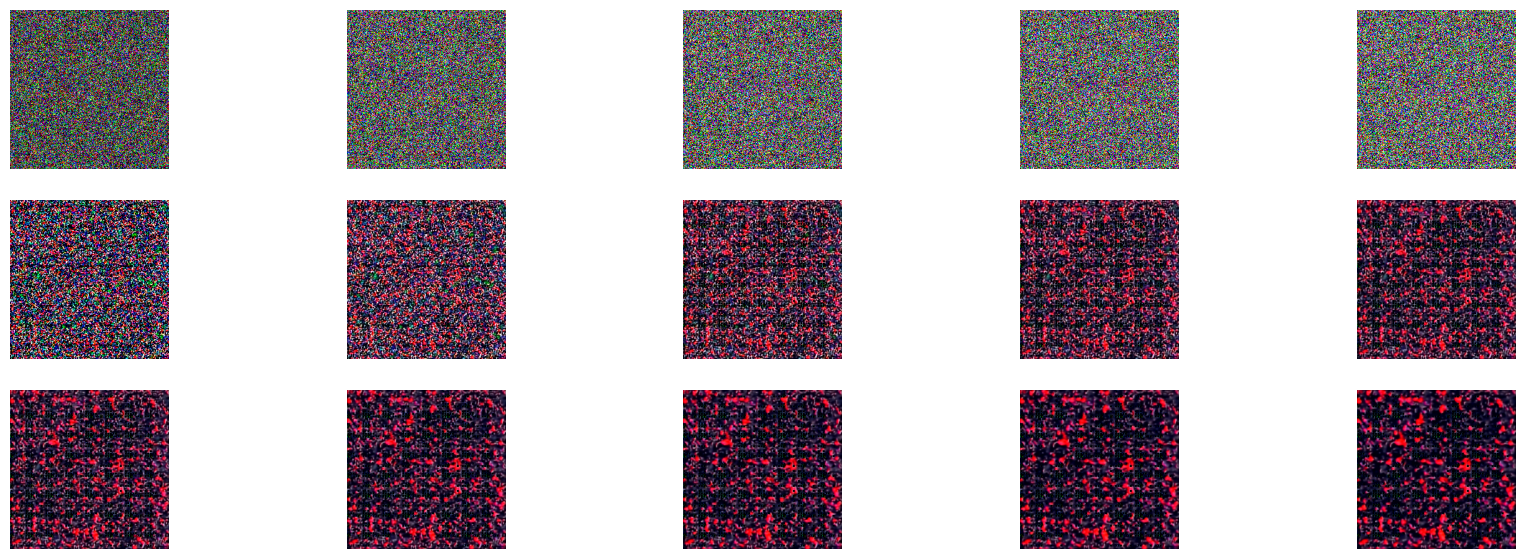

In [12]:
random_noised_1 = torch.randn((3, 256, 256)).to('cuda')
random_noised_2 = random_noised_1 + torch.randn(random_noised_1.shape).to('cuda')
random_noised_3 = random_noised_2 + torch.randn(random_noised_2.shape).to('cuda')
random_noised_4 = random_noised_3 + torch.randn(random_noised_3.shape).to('cuda')
random_noised_5 = random_noised_4 + torch.randn(random_noised_4.shape).to('cuda')

model_predict_unnoised_image_1 = model(random_noised_5[None, :, :, :])
model_predict_unnoised_image_2 = model(model_predict_unnoised_image_1)
model_predict_unnoised_image_3 = model(model_predict_unnoised_image_2)
model_predict_unnoised_image_4 = model(model_predict_unnoised_image_3)
model_predict_unnoised_image_5 = model(model_predict_unnoised_image_4)
model_predict_unnoised_image_6 = model(model_predict_unnoised_image_5)
model_predict_unnoised_image_7 = model(model_predict_unnoised_image_6)
model_predict_unnoised_image_8 = model(model_predict_unnoised_image_7)
model_predict_unnoised_image_9 = model(model_predict_unnoised_image_8)
model_predict_unnoised_image_10 = model(model_predict_unnoised_image_9)


fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(21, 7))
plt.axis('off')

axs[0, 0].axis('off')
axs[0, 0].imshow(random_noised_1.permute(1,2,0).cpu().detach().numpy())

axs[0, 1].axis('off')
axs[0, 1].imshow(random_noised_2.permute(1,2,0).cpu().detach().numpy())

axs[0, 2].axis('off')
axs[0, 2].imshow(random_noised_3.permute(1,2,0).cpu().detach().numpy())

axs[0, 3].axis('off')
axs[0, 3].imshow(random_noised_4.permute(1,2,0).cpu().detach().numpy())

axs[0, 4].axis('off')
axs[0, 4].imshow(random_noised_5.permute(1,2,0).cpu().detach().numpy())



axs[1, 0].axis('off')
axs[1, 0].imshow(model_predict_unnoised_image_1[0].permute(1,2,0).cpu().detach().numpy())

axs[1, 1].axis('off')
axs[1, 1].imshow(model_predict_unnoised_image_2[0].permute(1,2,0).cpu().detach().numpy())

axs[1, 2].axis('off')
axs[1, 2].imshow(model_predict_unnoised_image_3[0].permute(1,2,0).cpu().detach().numpy())

axs[1, 3].axis('off')
axs[1, 3].imshow(model_predict_unnoised_image_4[0].permute(1,2,0).cpu().detach().numpy())

axs[1, 4].axis('off')
axs[1, 4].imshow(model_predict_unnoised_image_5[0].permute(1,2,0).cpu().detach().numpy())



axs[2, 0].axis('off')
axs[2, 0].imshow(model_predict_unnoised_image_6[0].permute(1,2,0).cpu().detach().numpy())

axs[2, 1].axis('off')
axs[2, 1].imshow(model_predict_unnoised_image_7[0].permute(1,2,0).cpu().detach().numpy())

axs[2, 2].axis('off')
axs[2, 2].imshow(model_predict_unnoised_image_8[0].permute(1,2,0).cpu().detach().numpy())

axs[2, 3].axis('off')
axs[2, 3].imshow(model_predict_unnoised_image_9[0].permute(1,2,0).cpu().detach().numpy())

axs[2, 4].axis('off')
axs[2, 4].imshow(model_predict_unnoised_image_10[0].permute(1,2,0).cpu().detach().numpy())